In [7]:
import os
import numpy as np
import pandas as pd

In [20]:
# model paramter
model_params = {'n_win_size': 1000,
                'n_feat': 13,
                'n_class': 3,
                'epochs': 64,
                'batch': 1024,
                'learn_rate': 0.001,
                'drop': 0.5,
                'fc_size': 64,
                'blocks': '4_4_3'}
model_name = 'cnvnet'

def model_fname(keyargs, model_name):
    str_blocks = [str(x) for x in keyargs['blocks'].split('_')]
    str_blk = ''.join(str_blocks)
    return 'b{0}_e{1}_lr{2:.3f}_dr{3:.1f}_fc{4}_blk{5}_win{6}-{7}'.format(
        keyargs['batch'], keyargs['epochs'], keyargs['learn_rate'],
        keyargs['drop'], keyargs['fc_size'], str_blk, keyargs['n_win_size'], model_name)

model_fn = model_fname(model_params, model_name)
model_fn


'b1024_e64_lr0.001_dr0.5_fc64_blk443_win1000-cnvnet'

In [25]:
model_train_result_root_dir = '/zfssz2/ST_MCHRI/BIGDATA/' \
'PROJECT/NIPT_CNV/f_cnv_out'

# balanced data model
balanced_model_train_result_dir = os.path.join(
    model_train_result_root_dir, 'model')

# unbalanced data model
# DEL:DUP:NEU=1:2:3
unbalanced_model_train_result_dir = os.path.join(
    model_train_result_root_dir, 'model123')


# balncae dataset

In [28]:
bal_model_csv_dir = os.path.join(balanced_model_train_result_dir, 
                                'model_csvlogger')
bal_model_csv_fn = os.path.join(bal_model_csv_dir, model_fn)

In [33]:
csv_train_re = pd.read_csv(bal_model_csv_fn)
csv_train_re.tail()

,epoch,acc,loss,val_acc,val_loss
35,35,0.969720,0.082501,0.983157,0.045630
36,36,0.969717,0.082314,0.983453,0.044894
37,37,0.969784,0.082308,0.983461,0.044928
38,38,0.969867,0.082109,0.983462,0.044826
39,39,0.969834,0.082158,0.983409,0.044939


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

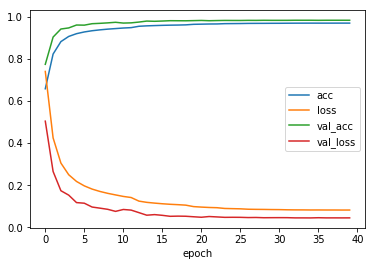

In [34]:
csv_train_re.plot(x='epoch', y=['acc', 'loss', 'val_acc', 'val_loss'])

# unbalanced dataset

In [35]:
unbal_model_csv_dir = os.path.join(unbalanced_model_train_result_dir, 
                                'model_csvlogger')
unbal_model_csv_fn = os.path.join(unbal_model_csv_dir, model_fn)

In [36]:
unb_csv_train_re = pd.read_csv(unbal_model_csv_fn)
unb_csv_train_re.tail()

,epoch,acc,loss,val_acc,val_loss
9,9,0.970570,0.082496,0.984621,0.044361
10,10,0.971831,0.078965,0.986730,0.037910
11,11,0.972730,0.076131,0.983714,0.046121
12,12,0.973585,0.073672,0.986200,0.039458
13,13,0.977510,0.062564,0.988705,0.031482


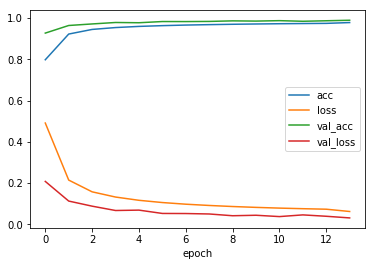

In [37]:
unb_csv_train_re.plot(x='epoch', y=['acc', 'loss', 'val_acc', 'val_loss'])